In [104]:
%pylab inline

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The Problem of Linear Regression

Linear regression model은 가장 기초적이면서도 많이 사용되는 모델중의 하나이며, $ \mathbf{X} $ 가 주어졌을대 $ \mathbf{Y} $ 에 대한 평균값을 예측을 합니다. <br>
해당 line은 `regression line`이라고 부릅니다.  

결과적으로 linear regression model $ \hat{y} = \mathbf{w} \mathbf{x} + b $ 는 response variable $ \hat{y} $ 를 quantitative 로 가정을 합니다. <br>
하지만 response variable이 qualitative (즉 categorical data) 인 경우가 상당수 많습니다. 


$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

<center>
    <span style="color:#777777">
Linear Regression Model 
    </span>
</center>


기본적으로 linear regression model은 확률을 예측할수 없습니다. <br>
이유는 linear regressino model의 예측값 $ y $ 의 range는 -infinity 에서 +infinity 인데, 확률로 표현되기 위해서는 0에서 1사이의 값의 range를 갖아야 하기 때문입니다. 여기에서 Logistic Regression을 이용하게 되면 0~1사이의 값을 갖는 확률로 표현이 가능해지기 때문입니다.

![Linear Regression vs Logistic Regression](images/logistic_regression_01.png)


> 인사이트 <br>
> Dependent variable이 categorical data일 경우 linear regression을 적용할 수 없다.


# Difference between Odds and Probability

먼저 logistic regression을 알기전에 odds에 대한 개념을 알고 있어야 합니다. 

odds라는 단어는 probability 와 유사하게 쓰이는 경우가 있고, 실제로 두개를 혼동해서 쓰는 경우가 있습니다. <br>
하지만 두개는 명벽하게 다른 의미를 갖고 있습니다. 

**Probability VS Odds**

1. **Probability(확률)**이란 $ \frac{성공횟수}{전체\ 시도\ 횟수} $

2. **Odds(승산)**이란 $ \frac{성공횟수}{실패횟수} $


**Euqal**

1. **Equal Odds** 는 1입니다. 즉 매번 1번 실패할때마다 1번 성공한다는 뜻입니다. **1:1**

2. **Equal Probabilities**는 0.5입니다. 2번 시도할때 1번 성공한다는 뜻입니다. 

**Range**

1. **Odds**는 **0~무한** 까지의 범위를 갖고 있으며, 1이상일 경우 성공확률이 실패확률보다 높다는 뜻입니다. 

2. **Probability**는 **0~1**까지의 범위를 갖고 있습니다. 


**Converting between Odds and Probability**

$$ Odds(Y) = \frac{Pr(Y=1)}{Pr(Y=0)} = \frac{Pr(Y=1)}{1-Pr(Y=1)} $$

$$ Pr(Y=1) = \frac{Odds(Y)}{1+Odds(Y)} = 1 - \frac{1}{1+Odds(Y)} $$

# Binary Logistic Regression

## Problem 1 (단순 확률 사용)

$ \mathbf{x} $ 가 dependent variable 그리고 $ y $ 가 반응변수 dependent variable 로서 qualitative (categorical data) 로 주어졌을대, <br>
linear regression을 사용해서 공식을 세우면 다음과 같습니다.

$$ P(Y=1\ |\ \mathbf{x} ) \ne \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$ 

좌측항 range는 0 ~ 1 입니다. 하지만 우측항 range는 $ - \infty $ 에서  $ + \infty $ 입니다.<br>
따라서 위의 공식은 식 자체가 성립되지 않습니다.

## Problem 2 (Odds ratio 사용)

Odds ratio를 사용하여 Y = 1 일때의 확률을 계산하여 linear regression으로 바꾸면 다음과 같습니다.

$$ \text{odds ratio} = \frac{P(Y=1\ |\ \mathbf{x})}{P(Y=0\ |\ \mathbf{x})} 
= \frac{P(Y=1\ |\ \mathbf{x})}{1-P(Y=1\ |\ \mathbf{x})} $$

$$ \frac{P(Y=1\ |\ \mathbf{x})}{1-P(Y=1\ |\ \mathbf{x})} 
\ne \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

오즈비의 range 범위는 0 ~ $ \infty $ 입니다. <br>
즉 승산(odds)가 높으면 높아질수록 값이 무한대로 커질수 있습니다.<br>
하지만 우측항의 linear model의 range는 음의 무한대를 갖고 있으므로 여전히 공식은 성립하지 않습니다.

> np.range(0, 1, 0.1) 을 할때 0.1이 아니라 0.01 또는 0.001 이렇게 바꿔줄대마다 y의 값은 100 또는 1000 까지도 계속 상승하게 됩니다.



[0.   0.11 0.25 0.43 0.67 1.   1.5  2.33 4.   9.  ]


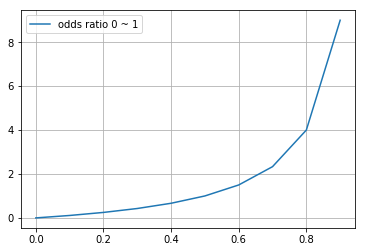

In [174]:
def odds_ratio(x):
    return x/(1-x)

x = np.arange(-0, 1, 0.1)
y = odds_ratio(x)

plot(x, y, label='odds ratio 0 ~ 1')
grid()
legend()
print(np.round(y, 2))

## Solution -> Log 추가 

위의 문제를 해결하기 위하여 logarithm을 추가하여 **log-odds** 또는 **logit function** 이라고 부르는 함수를 만들어 줍니다.

$$ \text{logit function} = \log \left( \frac{P(Y=1\ |\ \mathbf{x})}{1 - P(Y=1\ |\ \mathbf{x})}  \right) 
= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

왼쪽항은 **logit** (또는 **logit function** 또는 **logit link function**) 이라고 부릅니다.<br>
log odds의 range는 $ -\infty $ 에서 $ + \infty $ 입니다. <br>
따라서 우측항의 linear regression model의 range와 동일하게 되므로 공식이 성립하게 됩니다. 


[    -inf -4.594   -3.89    -3.477   -3.178   -2.943   -2.752   -2.586
 -2.441   -2.312   -2.197   -2.09    -1.992   -1.901   -1.815   -1.734
 -1.658   -1.586   -1.516   -1.45    -1.386   -1.325   -1.265   -1.208
 -1.152   -1.099   -1.046   -0.9946  -0.944   -0.8955  -0.8477  -0.8
 -0.753   -0.708   -0.663   -0.6187  -0.5747  -0.532   -0.4897  -0.4468
 -0.4043  -0.3633  -0.3228  -0.2812  -0.24    -0.1998  -0.1602  -0.11914
 -0.08026 -0.03934  0.       0.04114  0.0797   0.1213   0.1603   0.2018
  0.2417   0.283    0.3235   0.3657   0.406    0.4487   0.4902   0.5337
  0.576    0.6187   0.664    0.7075   0.755    0.8      0.8486   0.895
  0.9453   0.9946   1.047    1.099    1.154    1.208    1.268    1.325
  1.389    1.45     1.519    1.587    1.66     1.735    1.818    1.902
  1.996    2.092    2.201    2.316    2.447    2.59     2.76     2.95
  3.176    3.482    3.89     4.617        inf]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


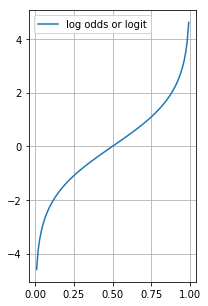

In [210]:
def log_odds_ratio(x):
    return np.log(odds_ratio(x))

x = np.arange(0, 1 + 0.01, 0.01, dtype=np.float16)

y = log_odds_ratio(x)

figure(figsize=(3, 5))
plot(x, y, label='log odds or logit')
grid()
legend()
print(y)

## Final Solution -> 확률을 기준으로 정리

사실 정말 알고 싶은것은 성공확률입니다. <br>
확률에 대한 기준으로 공식을 다시 정리하면 다음과 같습니다.

> 이때 공식을 줄이기 위해서 다음과 같은 조건을 설정합니다.  <br>
> $ P(Y=1\ |\ \mathbf{x}) = P(x) $ <br>
> $ \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n = \mathbf{w^Tx}+b = \theta $

$$ \begin{align} 
\ln \left(\frac{P(x)}{1- P(x)} \right) &= \theta \\ 
\\
\frac{P(x)}{1- P(x)} &=  e^{\theta} \\ 
\\
P(x) &= e^{\theta} \cdot \left( 1 - P(x) \right) \\
\\
P(x) &= e^{\theta} - e^{\theta} P(x) \\
\\
P(x) +  e^{\theta} P(x) &=  e^{\theta} \\
\\
P(x)(1 + e^{\theta}) &=   e^{\theta} \\
\\
P(x) &= \frac{e^{\theta}}{1 + e^{\theta}} = \frac{1}{1 + e^{-\theta}}
\end{align}$$

결론적으로 다음과 같은 **최종** 공식이 도출이 됩니다.

$$ P(Y=1\ |\ \mathbf{x}) = \frac{1}{1 + e^{\mathbf{w^Tx} + b}}$$

확률로 표현된 최종 도출된 공식은 logistic function 이라고 하며, 딥러닝 분야에서는 sigmoid function 이라고 합니다.<br>
Logistic function은 어떤 값이든 0~1사이의 값으로 출력이 됨으로 확률적 계산을 할 수 있게 됩니다.

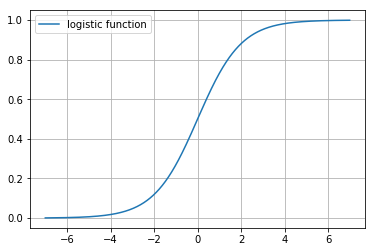

In [214]:
def logistic_function(x):
    """
    A.K.A sigmoid function
    """
    return 1/(1+np.exp(-x))

def log_logistic_function(x):
    return np.log(logistic_function(x))

x = np.arange(-7, 7, 0.01)
y = logistic_function(x)

plot(x, y, label='logistic function')
grid()
legend()
